<a href="https://colab.research.google.com/github/pranaypandey-cds/Emotiton-Classification/blob/main/MLSP_Assign1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [ ]:
# creating a new directory MLSP
os.chdir("/")
os.mkdir("MLSP")    # creating a new directory MLSP
os.chdir("/MLSP")   # changing to MLSP directory  
os.mkdir("Train")   # creating a  directory Train in MLSP
os.mkdir("Test")    # creating a  directory Test in MLSP

In [ ]:
# PCA function
# dataset is such that rows = # of images,column = # of total pixel/dimension
def PCA(dataset,k):                                             # k = no. of dimension after PCA
  No_of_img = dataset.shape[0]                                  
  mean=np.mean(dataset,0)                                       # mean of all dimensions
  dataset=dataset-mean
  
  # covariance 
  cov=(dataset.dot(dataset.T))/(No_of_img)  
  # calculating the  eigen vector and eigen value                       
  eig_val,eig_vec=np.linalg.eig(cov)
  eig_pair=[(eig_val[i],eig_vec[:,i]) for i in range(No_of_img)]      # making pair of eigen value and corresponding eigen vector
  eig_pair.sort(key=lambda x:-x[0])                                   # sorting of eigen pair in decreasing order
  

  # Now calculating the actual eigen vectors 
  act_eig_vec=np.zeros([10201,20])
  tt=(dataset.T)
  for i in range(No_of_img):
    act_eig_vec[:,i] =tt.dot(np.array(eig_pair[i][1]))
    # making them unit vector
    lamba=np.abs(eig_pair[i][0])**0.5             
    ff=np.sqrt(20) *lamba
    act_eig_vec[:,i]= act_eig_vec[:,i]/ff
  
  
  # Now calculating the projection of the original in the new dimensions
  alpha=dataset.dot(act_eig_vec)                            # alpha contain all projected points 
  
  # Now using the alpha and eigen vector for reconstructing again the original data matrix
  pca_res=np.zeros([20,10201])
  for i in range(k):
    for j in range(20):
      last=alpha[j,i]*act_eig_vec[:,i]
      pca_res[j,:]=pca_res[j,:]+last                        # pca_res is the matrix after reconstructing

  pca=pca_res+mean                                          
  return act_eig_vec[:,0:k],alpha[:,0:k],mean                          # returning the eigen vector and the projected points

In [ ]:
# LDA function

def LDA(dataset,label):   
  no_of_dim=dataset.shape[1]                                  # no. of dimension or no.of columns

  # cls#index contains index for which label is #              
  cls1index = np.where(label == 0)                        
  cls2index = np.where(label == 1)
  #print(cls1index[0])

  # cls#data contain data points for which label is #
  cls1data = dataset[cls1index[0]]
  cls2data = dataset[cls2index[0]]

  N1=cls1data.shape[0]                                      # no. of images in class1
  N2=cls2data.shape[0]                                      # no. of images in class2
  mean1=np.mean(cls1data,0)                                 # mean of class1 dataset 
  mean2=np.mean(cls2data,0)                                 # mean of class2 dataset
  #calculating Sw
  var1=np.zeros([no_of_dim,no_of_dim])
  var2=np.zeros([no_of_dim,no_of_dim])

  var1= ((cls1data-mean1).T).dot(cls1data-mean1)
  var2= ((cls2data-mean2).T).dot(cls2data-mean2)

  Sw=var1+var2                                       
 
  # calculating inverse of Sw
  Swinv=np.linalg.inv(Sw)

  # calculating the Sb matrix
  mean1=mean1.reshape((1,no_of_dim))
  mean2=mean2.reshape((1,no_of_dim))
  Sb=((mean1-mean2).T).dot((mean1-mean2))                                
  
  # calculating the eigen vector of inverse(Sw)*Sb
  eig_val,eig_vec=np.linalg.eig(Swinv.dot(Sb))
  eig_pair=[(eig_val[i],eig_vec[:,i]) for i in range(no_of_dim)]
  eig_pair.sort(key=lambda x:-x[0])

  lda_vector = np.real(eig_pair[0][1])                           # choosing the eigen vector corresponding to non zero eigen value
  # calculating the projection points in 1 dimension
  alpha=dataset.dot(lda_vector)                           # alpha contain 1 point for all image
  # fischer ratio
  num = lda_vector.T.dot(Sb.dot(lda_vector)) 
  den = lda_vector.T.dot(Sw.dot(lda_vector)) 
  fischer_ratio =  num/den
  
  return alpha,lda_vector,fischer_ratio

In [ ]:
def load_train_data():
  trin_data=np.zeros([20,10201])                                       # no of images in test data=20
  count=0
  os.chdir("/MLSP/Train")
  for i in os.listdir():
    img=plt.imread(i)
    trin_data[count,:]=np.array(img).reshape(1,10201)
    count=count+1;
  return trin_data

In [ ]:
# In test directory creating a data matrix, data matrix such that rows= no.of images and columns= dimensions
def load_test_data():
  test_data=np.zeros([10,10201])                                       # no of images in test data=10
  count=0
  os.chdir("/MLSP/Test")
  for i in os.listdir():
    img=plt.imread(i)
    test_data[count,:]=np.array(img).reshape(1,10201)
    count=count+1;
  return test_data
  

In [ ]:
#label for test data
def load_train_label():
  trin_label= np.zeros([20,1])
  count=0
  os.chdir("/MLSP/Train")
  for i in os.listdir():  
    if "happy" in i:
      trin_label[count]=1
    count=count+1
  return trin_label

In [ ]:
#label for test data
def load_test_label():
  tst_label= np.zeros([10,1])
  count=0
  os.chdir("/MLSP/Test")
  for i in os.listdir():  
    if "happy" in i:
      tst_label[count]=1
    count=count+1
  return tst_label

In [ ]:
# TRAINING FUNCTION
def training(k):
  # load training data
  train_dataset = load_train_data()  
  # load training label     
  train_label = load_train_label()
  # PCA
  lg,all,mean_train = PCA(train_dataset,k) 
  # LDA
  all1,lda,fis = LDA(all,train_label)
 
  # seperating different label lda values
  cls1index = np.where(train_label == 0)                        
  cls2index = np.where(train_label == 1)

  cls1LDA = all1[cls1index[0]]
  cls2LDA = all1[cls2index[0]]
  # calcualting mean of class with label 0 and 1 (seperately)
  mean_cls1LDA = np.mean(cls1LDA)
  mean_cls2LDA = np.mean(cls2LDA)

  # threshold
  threshold = (mean_cls1LDA + mean_cls2LDA)/2
  print("Threshold value is ",threshold)
  if (mean_cls1LDA < threshold):
    condition = 1
  else:
    condition = 2

  # plots
  plt.figure()
  plt.plot(cls1LDA,train_label[cls1index[0]],'*')
  plt.plot(cls2LDA, train_label[cls2index[0]],'*')
  plt.title(k)
  
  return mean_train, lg, lda, condition, threshold, fis

In [ ]:
# TESTING FUNCTION
def testing(mean_train,eig_vec_pca_train,lda_vec,con,threshld):
  # loading test_data
  test_dataset = load_test_data()
  # loading test label
  test_label = load_test_label()
  # substracting training mean
  test_dataset = test_dataset - mean_train 
  # projecting by eigen vector from PCA
  alpha_test = test_dataset.dot(eig_vec_pca_train)
  # projecting by LDA vector
  final=alpha_test.dot(lda_vec)


  predict=np.zeros([10,1])
  for i in range(10):
    if (con == 2):
      if (final[i]<threshld):
        predict[i]=1
    if (con == 1):
      if (final[i]>threshld):
        predict[i]=1
        
  return predict,test_label


In [ ]:
def accuracy(predict,actual):
    count = 0
    for i in range(len(predict)):
        if predict[i] == actual[i]:
            count=count+1
    ret = count/len(predict)
    print("Accuracy is ",ret)
    return 

Threshold value is  67.59438832644315
0.32133051066173157
Accuracy is  0.9


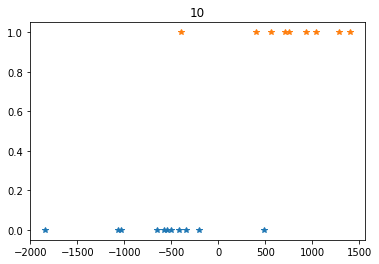

In [ ]:
# K=10
mean_train, lg, lda, condition, threshold, fischer_ratio = training(10)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  67.58854494968926
0.32183952284838996
Accuracy is  1.0


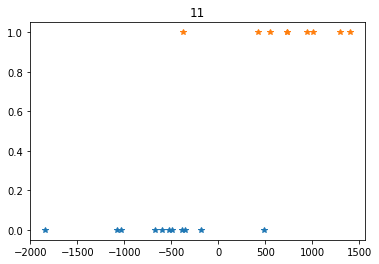

In [ ]:
# K=11
mean_train, lg, lda, condition, threshold, fischer_ratio= training(11)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  66.89674572699363
0.5725180705272754
Accuracy is  0.9


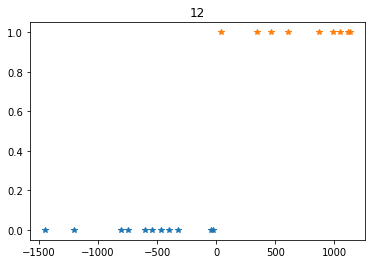

In [ ]:
# K=12
mean_train, lg, lda, condition, threshold, fischer_ratio = training(12)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  65.44141590121063
1.5786207430139096
Accuracy is  0.9


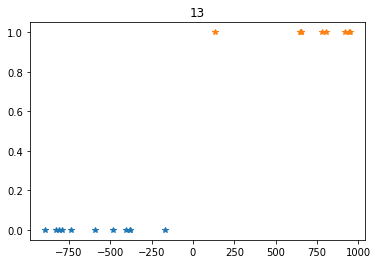

In [ ]:
# K=13
mean_train, lg, lda, condition, threshold, fischer_ratio = training(13)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  65.43465380100434
1.5899642771708782
Accuracy is  0.9


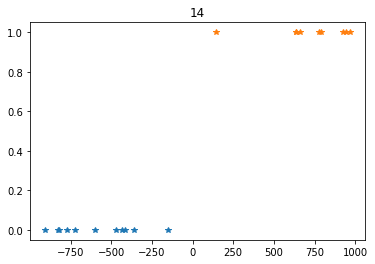

In [ ]:
# K=14
mean_train, lg, lda, condition, threshold, fischer_ratio= training(14)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  65.43447992522545
1.590080154918751
Accuracy is  0.9


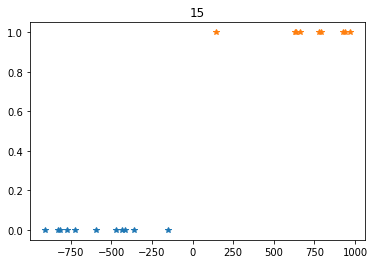

In [ ]:
# K=15
mean_train, lg, lda, condition, threshold, fischer_ratio= training(15)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  64.85230822021475
2.0044757846726626
Accuracy is  0.9


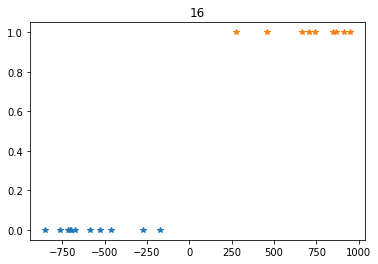

In [ ]:
# K=16
mean_train, lg, lda, condition, threshold, fischer_ratio = training(16)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  63.93338984427737
2.799681879263567
Accuracy is  0.9


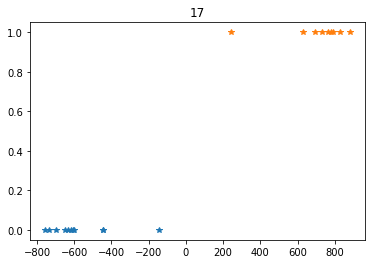

In [ ]:
# K=17
mean_train, lg, lda, condition, threshold, fischer_ratio= training(17)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  62.72304510532484
4.645457055803568
Accuracy is  0.9


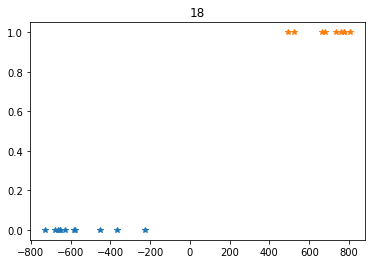

In [ ]:
# K=18
mean_train, lg, lda, condition, threshold,fischer_ratio= training(18)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  59.668327784550684
8842247762685728.0
Accuracy is  0.9


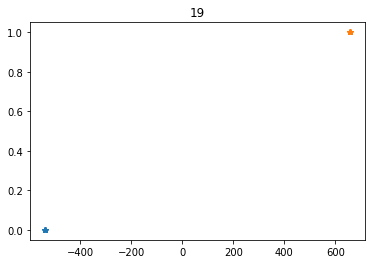

In [ ]:
# K=19
mean_train, lg, lda, condition, threshold,fischer_ratio = training(19)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)

Threshold value is  7.638457646650987e-05
5010224352507465.0
Accuracy is  0.9


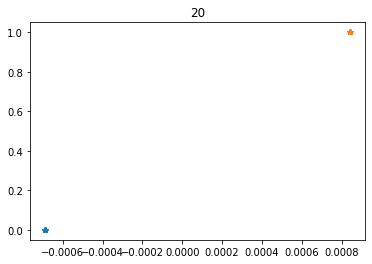

In [ ]:
# K=20
mean_train, lg, lda, condition, threshold, fischer_ratio= training(20)
predict, test_label = testing(mean_train, lg, lda, condition, threshold)
print(fischer_ratio)
accuracy(predict, test_label)